In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import experimentalist as expy


In [12]:
def make_plot_dicts(methods,key_name):
    
    labels = {m: key_name +' ' +m  for m in methods}
    colors = sns.color_palette("colorblind", n_colors=len(methods), desat=.7)
    sns.palplot(colors)
    color_dict_index = {m:i for i,m in enumerate(methods)}
    color_dict = {key:colors[value] for key,value in color_dict_index.items()}
    linestyles = {m:'-' for m in methods}
    return color_dict,labels,linestyles, colors

# Querying a database

In [13]:
log_name = 'test'
out_dir = 'data/outputs'
reader = expy.Reader(os.path.join(out_dir,log_name), reload=True)

query = {'metadata.max_iter' : [100],
        }

out =  reader.search(query)


# Adding data to the query output

In [18]:
last_loss = expy.maps.Last("metrics.loss") # get the name of the key
out.add([last_loss]) # return name of key
last_loss.name

'metadata.metrics.loss_last'

# Grouping and aggregation

In [19]:


aggmin = expy.maps.AggMin(last_loss.name)

aggmaps = [aggmin,
           expy.maps.AggMax(last_loss.name)]
group_keys = [['metadata.optimizer.name']]

all_list_config_dicts = out.groupBy(group_keys).agg(aggmaps).toConfigCollection()





In [26]:
list_config_dicts = all_list_config_dicts[aggmin.name]

aggmaps = [expy.maps.AggAvgStd("metrics.loss")
        ,"metrics.iteration"]

list_config_dicts.add(aggmaps)


In [20]:
all_list_config_dicts

{'metadata.metrics.loss_last_aggmin': <experimentalist.collections.ConfigCollection at 0x7fa83757d2b0>,
 'metadata.metrics.loss_last_aggmax': <experimentalist.collections.ConfigCollection at 0x7fa83755c7f0>}

# Extracting results from list of (aggregated) experiments

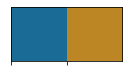

In [16]:
values_list = ["metrics.loss_avg",
            "metrics.iteration",
            "group_keys_val",
            "group_keys"]
gen_list = list_config_dicts.get(values_list)
methods = [data['group_keys_val'] for data in gen_list]
key_name = gen_list[0]['group_keys']+':'
color_dict, labels_dict, linestyles_dict,colors = make_plot_dicts(methods,key_name)


In [28]:
key_name

'name:'

In [32]:
gen_list[1]

{'metrics.loss_avg': [0,
  3,
  6,
  9,
  12,
  15,
  18,
  21,
  24,
  27,
  30,
  33,
  36,
  39,
  42,
  45,
  48,
  51,
  54,
  57,
  60,
  63,
  66,
  69,
  72,
  75,
  78,
  81,
  84,
  87,
  90,
  93,
  96,
  99,
  102,
  105,
  108,
  111,
  114,
  117,
  120,
  123,
  126,
  129,
  132,
  135,
  138,
  141,
  144,
  147,
  150,
  153,
  156,
  159,
  162,
  165,
  168,
  171,
  174,
  177,
  180,
  183,
  186,
  189,
  192,
  195,
  198,
  201,
  204,
  207,
  210,
  213,
  216,
  219,
  222,
  225,
  228,
  231,
  234,
  237,
  240,
  243,
  246,
  249,
  252,
  255,
  258,
  261,
  264,
  267,
  270,
  273,
  276,
  279,
  282,
  285,
  288,
  291,
  294,
  297],
 'metrics.iteration': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,


# Plotting results

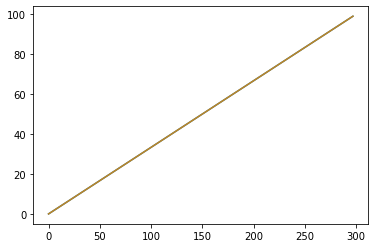

In [17]:
num_x =1
num_y = 1
fig, ax = plt.subplots(1,1, figsize=(6,4))


for data in gen_list:
    color = color_dict[data["group_keys_val"]]
    label = labels_dict[data["group_keys_val"]]
    ax.plot(data["metrics.loss_avg"],data["metrics.iteration"], color=color,label=label)




